$\displaystyle \frac{a}{b\cdot e^{-cx}}$

Введем замену $A = \frac{a}{b} \rightarrow $ получили уравнение $y = \ln(A) + cx$, то есть получили линейную модель $y = C + cx$



In [1]:
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y = np.array([50, 53, 56, 59, 62, 64, 66, 68, 70, 71, 72, 73, 74])

Применим МНК

$\displaystyle c = \frac{n\sum x_iy_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}$

$n = 13$, остальные коэффиценты вычислим дальше в коде

$C = \ln(A) = \overline{y} - c \cdot \overline{x}$

In [10]:
n = 13
sumx_i = 0
sumy_i = 0
sumx_i2 = 0
sumx_iy_i = 0
y_ln = np.log(y)
for i in range(13):
    sumx_i += x[i]
    sumy_i += y_ln[i]
    sumx_i2 += x[i]**2
    sumx_iy_i += x[i] * y_ln[i]

c = (n * sumx_iy_i - sumx_i * sumy_i) / (13 * sumx_i2 - (sumx_i)**2)
A = np.exp(y_ln.mean() - c * x.mean())
print(c, A)
print(y_ln.mean(), x.mean())

0.03196220611534562 52.820523633234615
4.158673057052902 6.0


Зафиксируем значение $b$, иначе у меня нет идей, как разделить $A$ на два коэффицента $a$ и $b$.

Пусть $b = 1$, тогда $a = 52.820523633234615$

Считаем ошибку по формуле $\delta = \sqrt{\frac{1}{n}\sum (y_i - \hat{y}_i)^2}$

In [17]:
y_pred = A * np.exp(c * x)
delta = np.sqrt(np.mean((y - y_pred) ** 2))
print(delta)

1.9145376271479422


Также я нашел коэффиценты встроенными методами питона. Полагаю, что значения отличаются, потому что я фиксировал значение $b$, а в питон оптимизирует значения коэффицентов каким-то другим методом, который не требует фиксации

Результат: 281481.17,5271.00,0.03,1.87


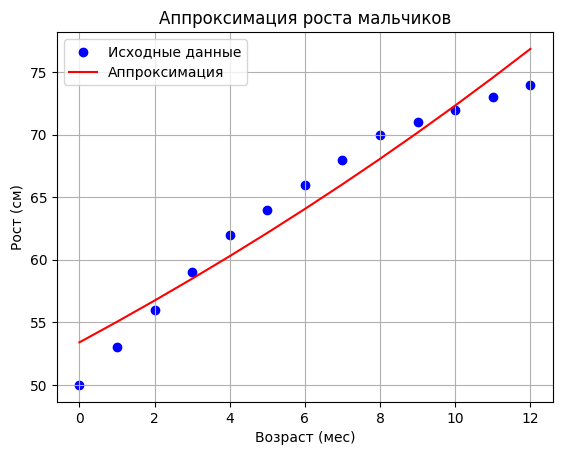

In [18]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y = np.array([50, 53, 56, 59, 62, 64, 66, 68, 70, 71, 72, 73, 74])

def g(x, a, b, c):
    return a / (b * np.exp(-c * x))

initial_guess = [1000, 10, 0.1]

params, _ = curve_fit(g, x, y, p0=initial_guess)
a, b, c = params

y_pred = g(x, a, b, c)

delta = np.sqrt(np.mean((y - y_pred)**2))

print(f"Результат: {a:.2f},{b:.2f},{c:.2f},{delta:.2f}")

plt.scatter(x, y, label="Исходные данные", color="blue")
plt.plot(x, y_pred, label="Аппроксимация", color="red")
plt.xlabel("Возраст (мес)")
plt.ylabel("Рост (см)")
plt.title("Аппроксимация роста мальчиков")
plt.legend()
plt.grid(True)
plt.show()
